5


/home/ldy/miniconda3/envs/shikra/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


self.subjects ['sub-02']
exclude_subject None
data_tensor torch.Size([66160, 63, 250])
Data tensor shape: torch.Size([66160, 63, 250]), label tensor shape: torch.Size([66160]), text length: 1654, image length: 16540
self.subjects ['sub-02']
exclude_subject None
Data tensor shape: torch.Size([200, 63, 250]), label tensor shape: torch.Size([200]), text length: 200, image length: 200
Index 79, Label: 79, text: This picture is french_horn


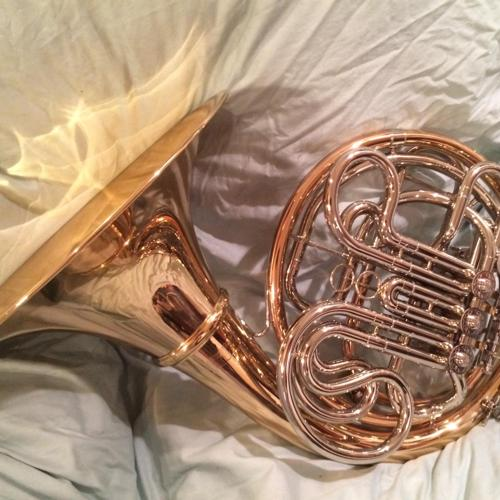

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os
from torch.nn import functional as F
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import requests
import pickle
import os
import clip

proxy = 'http://127.0.0.1:7890'
os.environ['http_proxy'] = proxy
os.environ['https_proxy'] = proxy
cuda_device_count = torch.cuda.device_count()
print(cuda_device_count)
device = "cuda:3" if torch.cuda.is_available() else "cpu"
# vlmodel, preprocess = clip.load("ViT-B/32", device=device)
model_type = 'ViT-H-14'

import open_clip
# vlmodel, preprocess_train, feature_extractor = open_clip.create_model_and_transforms(
#     model_type, pretrained='laion2b_s32b_b79k', precision='fp32', device=device)

import json
from omegaconf import OmegaConf
import os

cfg = OmegaConf.load(os.path.join("/mnt/dataset0/ldy/Workspace/FLORA/configs/config.yaml"))
cfg = OmegaConf.structured(cfg)
# Access the paths from the config
img_directory_training = cfg.megdataset.img_directory_training
img_directory_test = cfg.megdataset.img_directory_test
from eegdatasets import EEGDataset


# Instantiate the dataset and dataloader
data_path = "/home/ldy/4090_Workspace/4090_THINGS/Preprocessed_data_250Hz"  # Replace with the path to your data
data_path = data_path
train_dataset = EEGDataset(data_path, subjects = ['sub-02'], train=True)    
test_dataset = EEGDataset(data_path, subjects = ['sub-02'], train=False)
# train_dataset = MEGDataset(data_path, exclude_subject = 'sub-01', train=True)    
# test_dataset = MEGDataset(data_path, exclude_subject = 'sub-01', train=False)    
# train_dataset = MEGDataset(data_path, train=True) 
# test_dataset = MEGDataset(data_path, train=False) 
# 训练的eeg数据：torch.Size([16540, 4, 17, 100]) [训练图像数量，训练图像重复数量，通道数，脑电信号时间点]
# 测试的eeg数据：torch.Size([200, 80, 17, 100])
# 1秒 'times': array([-0.2 , -0.19, -0.18, ... , 0.76,  0.77,  0.78, 0.79])}
# 17个通道'ch_names': ['Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'P6', 'P2']
# 100 Hz
# train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

i = 80*1-1
_, x, label, text, text_features, img, img_features, _  = test_dataset[i]
print(f"Index {i}, Label: {label}, text: {text}")
Image.open(img)

In [2]:
for i in range(80):
    _, x, label, text, text_features, img, img_features, _ = train_dataset[i]
    print(f"Index {i}, Label: {label}, text: {text}")
    Image.open(img)


Index 0, Label: 0, text: This picture is aardvark
Index 1, Label: 0, text: This picture is aardvark
Index 2, Label: 0, text: This picture is aardvark
Index 3, Label: 0, text: This picture is aardvark
Index 4, Label: 0, text: This picture is aardvark
Index 5, Label: 0, text: This picture is aardvark
Index 6, Label: 0, text: This picture is aardvark
Index 7, Label: 0, text: This picture is aardvark
Index 8, Label: 0, text: This picture is aardvark
Index 9, Label: 0, text: This picture is aardvark
Index 10, Label: 0, text: This picture is aardvark
Index 11, Label: 0, text: This picture is aardvark
Index 12, Label: 0, text: This picture is aardvark
Index 13, Label: 0, text: This picture is aardvark
Index 14, Label: 0, text: This picture is aardvark
Index 15, Label: 0, text: This picture is aardvark
Index 16, Label: 0, text: This picture is aardvark
Index 17, Label: 0, text: This picture is aardvark
Index 18, Label: 0, text: This picture is aardvark
Index 19, Label: 0, text: This picture is

In [3]:
for i in range(200):
    _, x, label, text, text_features, img, img_features, _ = test_dataset[i]
    print(f"Index {i}, Label: {label}, text: {text}")
    Image.open(img)


Index 0, Label: 0, text: This picture is aircraft_carrier
Index 1, Label: 1, text: This picture is antelope
Index 2, Label: 2, text: This picture is backscratcher
Index 3, Label: 3, text: This picture is balance_beam
Index 4, Label: 4, text: This picture is banana
Index 5, Label: 5, text: This picture is baseball_bat
Index 6, Label: 6, text: This picture is basil
Index 7, Label: 7, text: This picture is basketball
Index 8, Label: 8, text: This picture is bassoon
Index 9, Label: 9, text: This picture is baton4
Index 10, Label: 10, text: This picture is batter
Index 11, Label: 11, text: This picture is beaver
Index 12, Label: 12, text: This picture is bench
Index 13, Label: 13, text: This picture is bike
Index 14, Label: 14, text: This picture is birthday_cake
Index 15, Label: 15, text: This picture is blowtorch
Index 16, Label: 16, text: This picture is boat
Index 17, Label: 17, text: This picture is bok_choy
Index 18, Label: 18, text: This picture is bonnet
Index 19, Label: 19, text: T